In [57]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [58]:
api_key = os.getenv("claudeAPI")

- LLM is trained on previous data
- Prompt : tell me about the today's AI news : can't produce the output
- For Answer LLM need to be dependent of third party tool to get the context 

Creating agent is more simpler to make an agent using LangChain Version 1

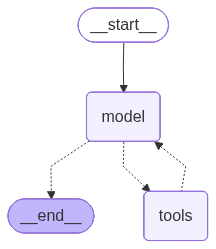

In [ ]:
# Agents
from langchain.agents import create_agent
from langchain_anthropic import ChatAnthropic


def get_weather(city: str) -> str:
    """Get the weather for a city"""  
    return f"The weather in {city} is sunny"


if api_key:
    llm = ChatAnthropic(
        model="claude-haiku-4-5-20251001",
        api_key=api_key
    )

else:
    llm = ChatAnthropic(
        model="claude-haiku-4-5-20251001"
    )

# Pass the model instance (not a string) to create_agent
agent = create_agent(
    model = llm,
    tools = [get_weather],
    system_prompt = "You are a helpful assistant."
)
agent

In [75]:
# Agent expects a dictionary with "messages" key, not a plain string
result = agent.invoke({"messages": [("user", "What's the weather today in toronto")]})
print(result)
print(result["messages"][-1])

{'messages': [HumanMessage(content="What's the weather today in toronto", additional_kwargs={}, response_metadata={}, id='7db873f6-aa4e-4950-bda8-4351ec9e9281'), AIMessage(content=[{'id': 'toolu_01SVvB8eSsgAYotRuPNp9r39', 'input': {'city': 'toronto'}, 'name': 'get_weather', 'type': 'tool_use'}], additional_kwargs={}, response_metadata={'id': 'msg_01G12TwtJw518rCYLF8N2TCK', 'model': 'claude-haiku-4-5-20251001', 'stop_reason': 'tool_use', 'stop_sequence': None, 'usage': {'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 571, 'output_tokens': 54, 'server_tool_use': None, 'service_tier': 'standard'}, 'model_name': 'claude-haiku-4-5-20251001', 'model_provider': 'anthropic'}, id='lc_run--019b6124-0953-7d53-a903-40c35ee37bfa-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'toronto'}, 'id': 'toolu_01SVvB8eSsgAYotRuPNp9r39', 'type': 'tool_call'}], usage_metadata={'input_tok